<h1 align='center'>Sepsis Detection with ML API using FastAPI<h1>

## Business Objective

Early detection of sepsis is essential for patients to receive timely treatment and improve their chances of survival. Fortunately, machine learning technology can help medical professionals identify sepsis quickly and accurately. By using a Machine-Learning (ML) API for sepsis detection, healthcare providers can analyze a patient's medical data and receive real-time notifications when symptoms of sepsis are present.

This can lead to faster diagnosis and treatment, saving lives and reducing healthcare costs. With the power of ML technology at our fingertips, we have an opportunity to make a significant impact on the fight against sepsis.

`Stakeholders:` Healthcare Providers

`Goal:`The aim of this project is to develop an ML-powered sepsis detection system capable of accurately identifying early signs of sepsis in patient data to enable timely intervention and improve survival rates.


### Hypothesis

`Null Hypothesis:` There is no association between age and the likelihood of developing sepsis.

`Alternate Hypothesis:` There is a significant association between age and the likelihood of developing sepsis.


### Analytical Questions

1. Is there a relationship between vital signs (PRG, PL, PR, SK, TS) and the likelihood of sepsis?

2. How do specific features (M11, Age) correlate with the presence of sepsis?

3. What is the breakdown of insured patients based on their sepsis status?

4. What age group has the highest number of insured patients with sepsis?

In [1]:
# Data Handling
import numpy as np
import pandas as pd

# Visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# EDA and Feature Processing
from sklearn.decomposition import PCA
import scipy.stats as stats

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, RobustScaler, FunctionTransformer
from imblearn.pipeline import Pipeline as imblearn_pipeline
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
import joblib

# Other utilities
from warnings import filterwarnings
filterwarnings('ignore')

## Data Understanding

The table below shows a detailed description of the columns in the dataset

### Data Fields

| Column   Name                | Description                                                                                                                                                                                                  |
|------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ID                           | Unique number to represent patient ID                                                                                                                                                                        |
| PRG           |  Plasma glucose|
| PL               |   Blood Work Result-1 (mu U/ml)                                                                                                                                                |
| PR              | Blood Pressure (mm Hg)|
| SK              | Blood Work Result-2 (mm)|
| TS             |     Blood Work Result-3 (mu U/ml)|                                                                                  
| M11     |  Body mass index (weight in kg/(height in m)^2|
| BD2             |   Blood Work Result-4 (mu U/ml)|
| Age              |    patients age  (years)|
| Insurance | If a patient holds a valid insurance card|
| Sepssis                 | Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise |

### Data Loading

In [2]:
# Load dataset
train_data = pd.read_csv('../data/Paitients_Files_Train.csv')
train_data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


### Exploratory Data Analysis (EDA)

In [3]:
# Check data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [4]:
# Check summary statistics on numerical columns
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [5]:
train_data.describe(include='object').T

,count,unique,top,freq
ID,599,599,ICU200010,1
Sepssis,599,2,Negative,391


In [6]:
# Check for null values
train_data.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [7]:
# Check for duplicates in the dataset
train_data.duplicated().sum()

0

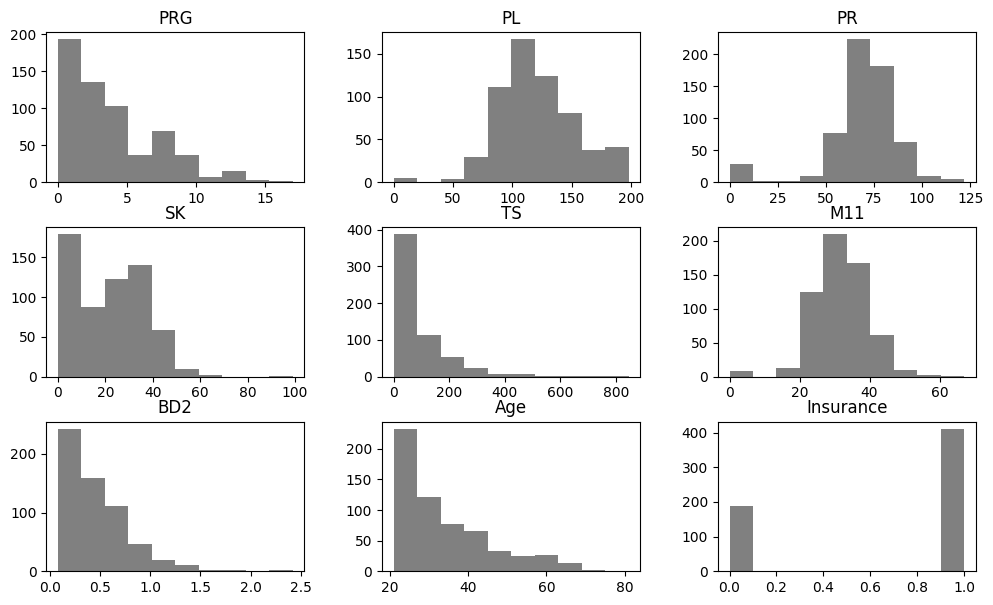

In [8]:
# Display the distribution of the feature columns
train_data.hist(figsize=(12, 7), grid=False, color='grey')
plt.show()

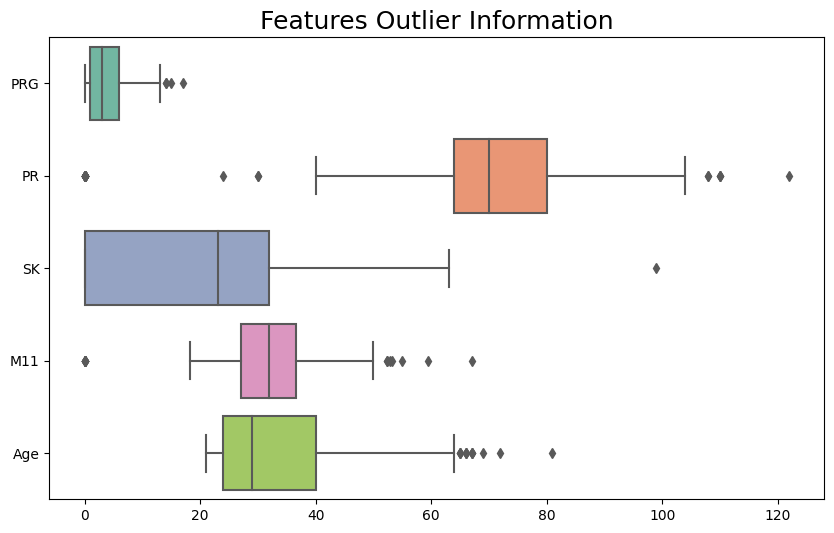

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(train_data.drop(['TS', 'Insurance', 'PL', 'BD2'], axis=1), orient='h', palette='Set2')
plt.title('Features Outlier Information', fontsize=18)
plt.show()

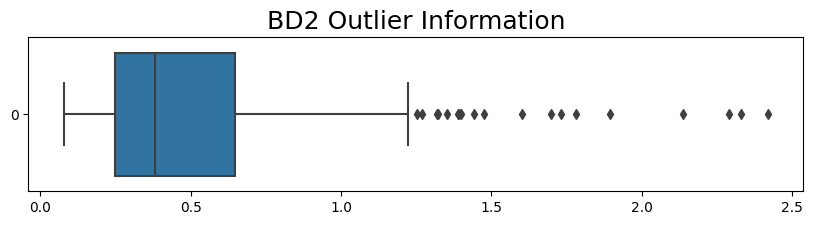

In [10]:
plt.figure(figsize=(10, 2))
sns.boxplot(train_data['BD2'], orient='h')
plt.title('BD2 Outlier Information', fontsize=18)
plt.show()

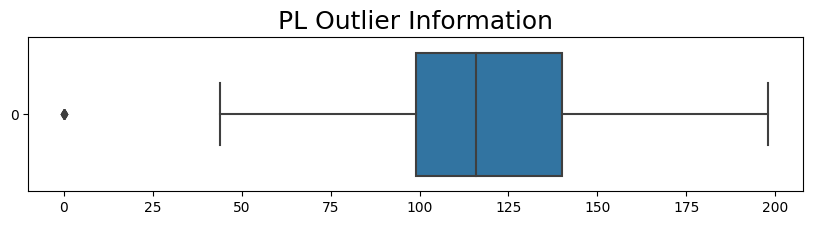

In [11]:
plt.figure(figsize=(10, 2))
sns.boxplot(train_data['PL'], orient='h')
plt.title('PL Outlier Information', fontsize=18)
plt.show()

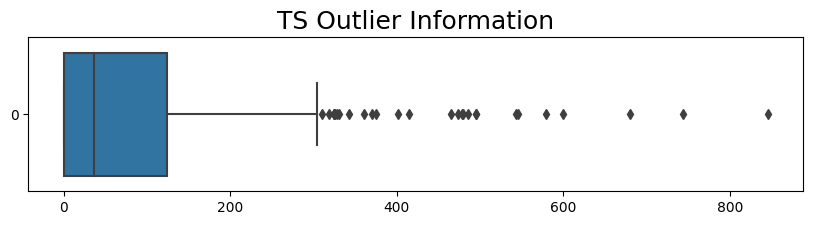

In [12]:
plt.figure(figsize=(10, 2))
sns.boxplot(train_data['TS'], orient='h')
plt.title('TS Outlier Information', fontsize=18)
plt.show()

### Univariate Analysis

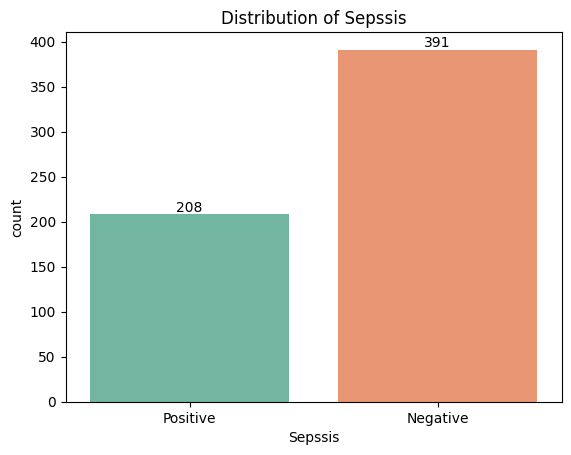

In [13]:
ax = sns.countplot(train_data, x='Sepssis', palette='Set2')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Distribution of Sepssis')
plt.grid(visible=False)
plt.show()

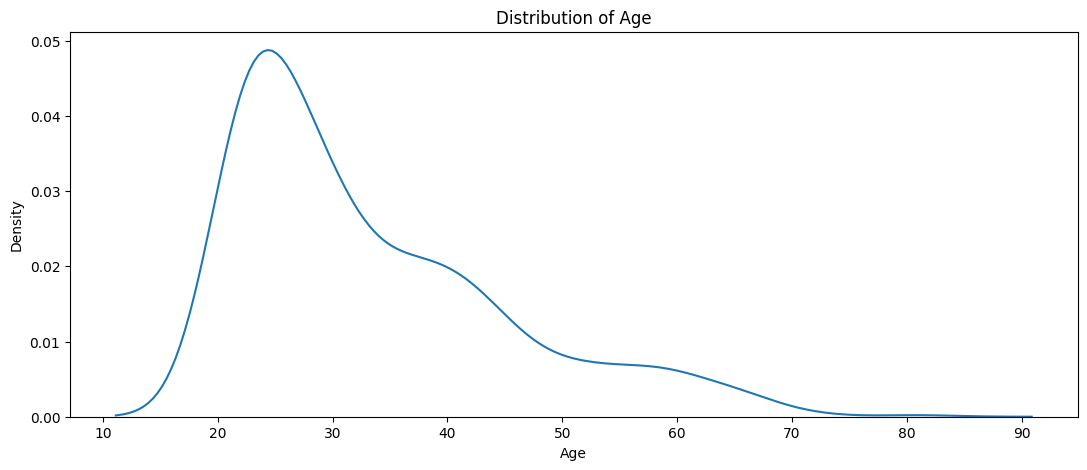

In [14]:
plt.figure(figsize=(13, 5))
sns.kdeplot(train_data, x='Age')
plt.title('Distribution of Age')
plt.show()

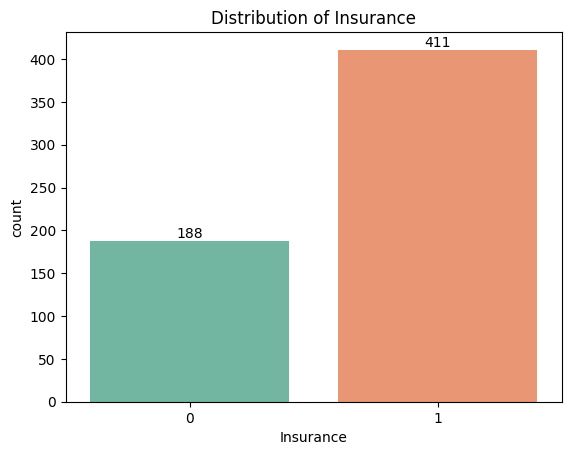

In [15]:
ax = sns.countplot(train_data, x='Insurance', palette='Set2')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Distribution of Insurance')
plt.grid(visible=False)
plt.show()

### Bivariate Analysis

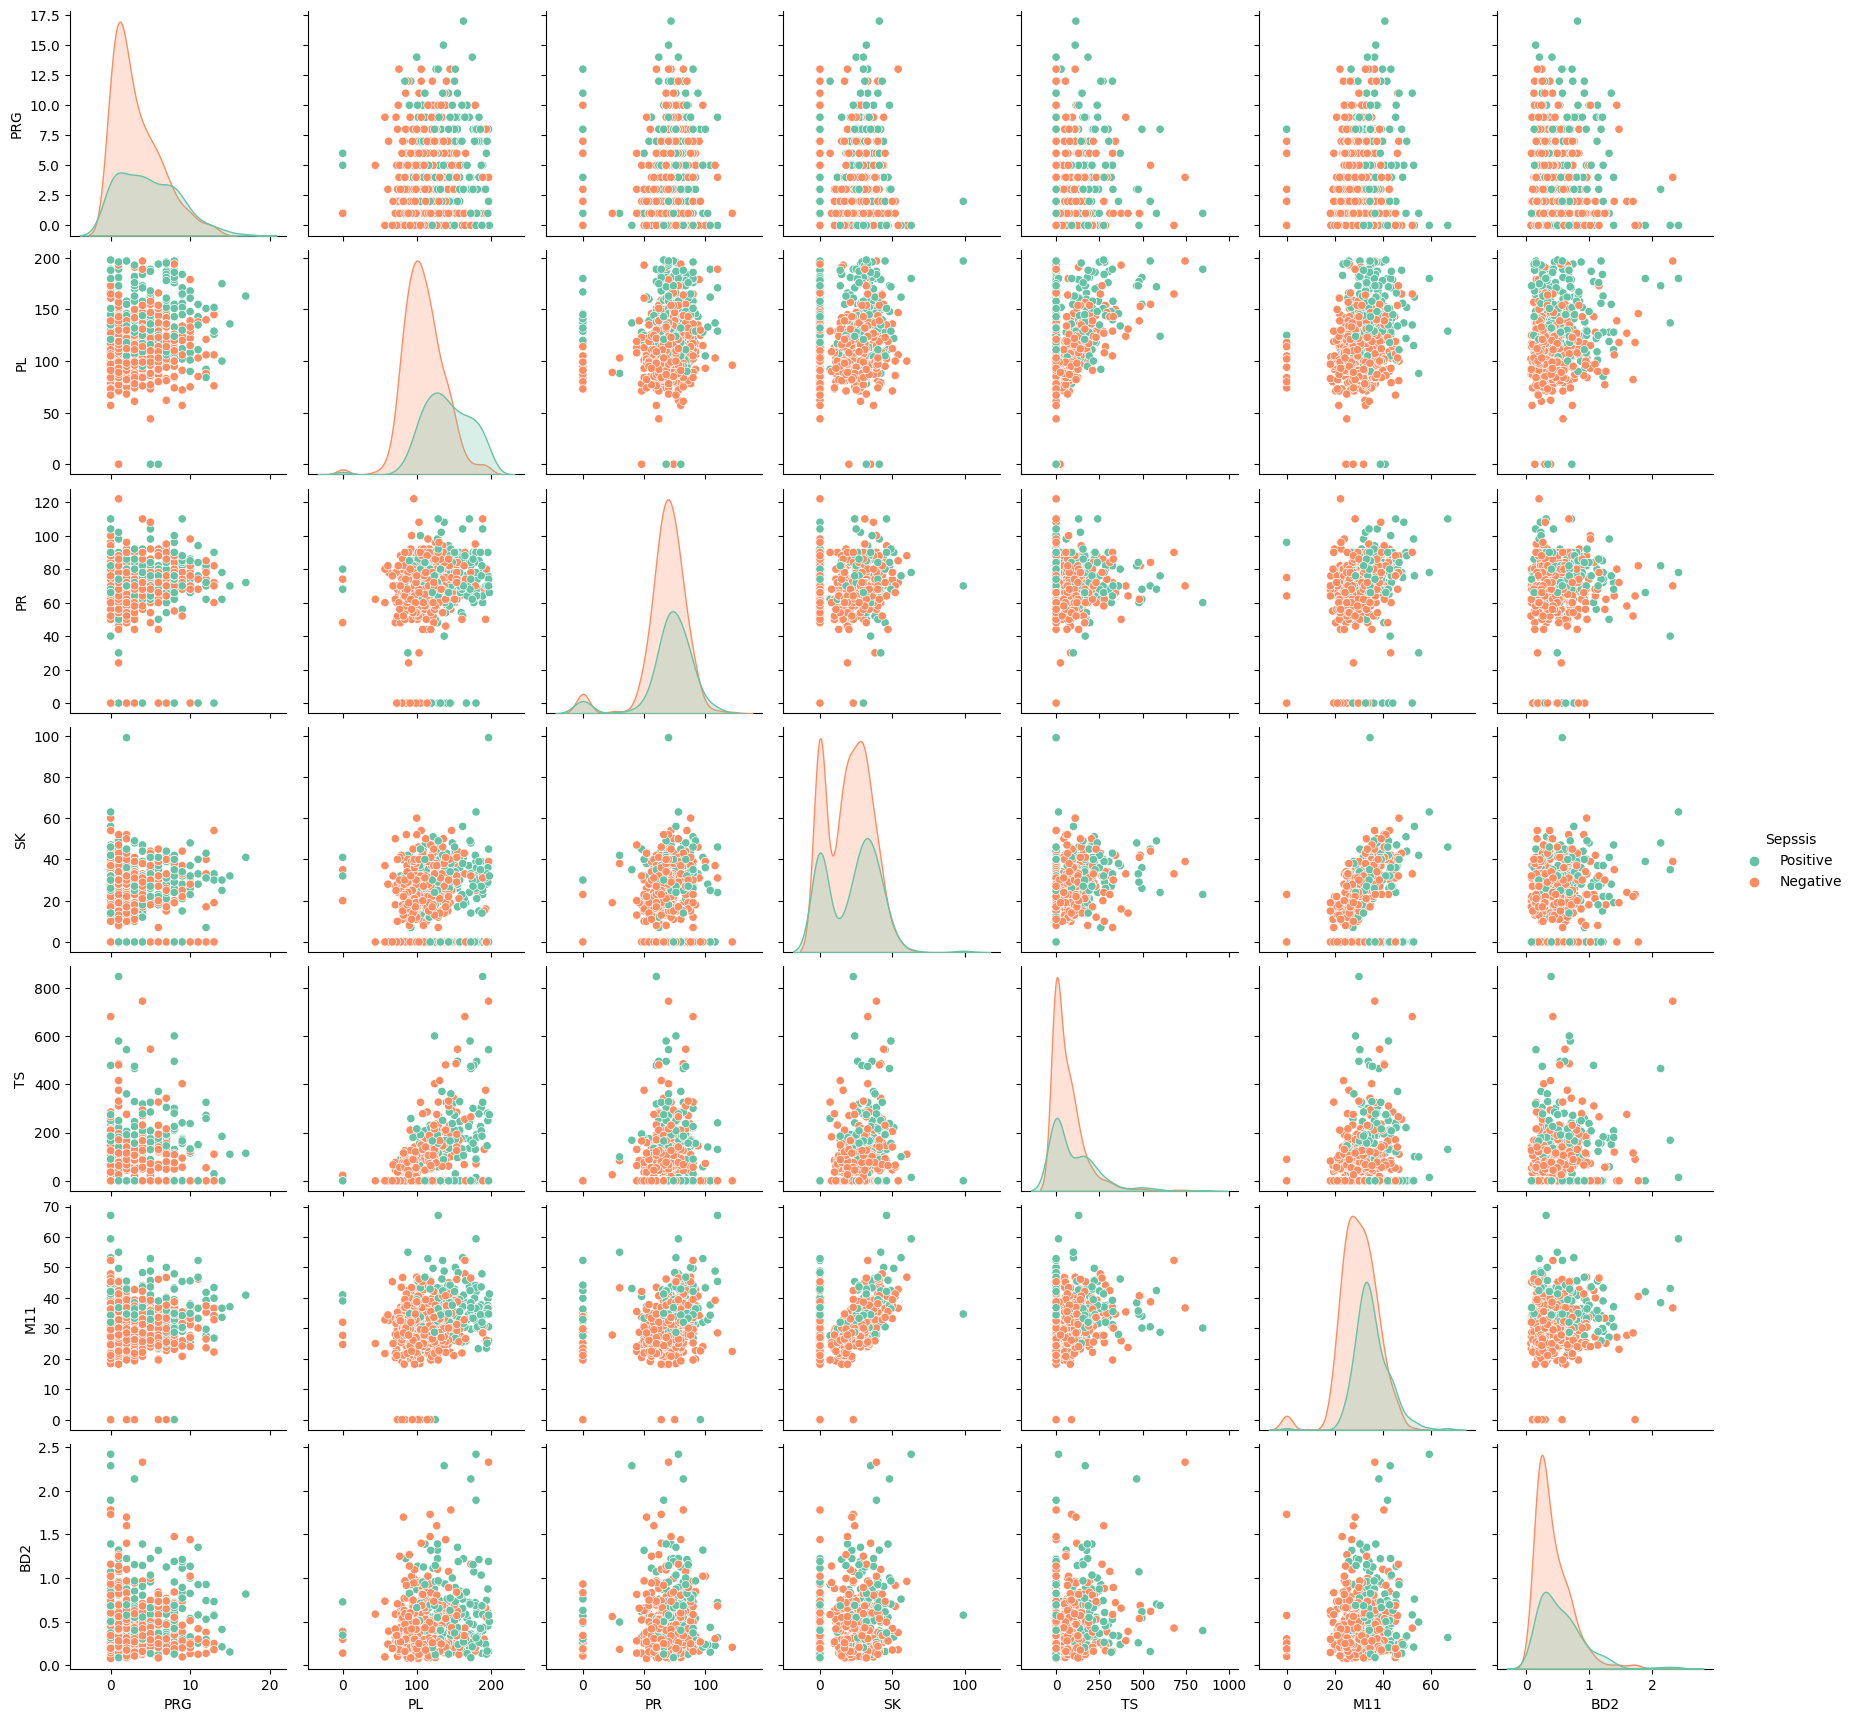

In [16]:
sns.pairplot(train_data.drop(['Insurance', 'Age'], axis=1), hue='Sepssis', palette='Set2');

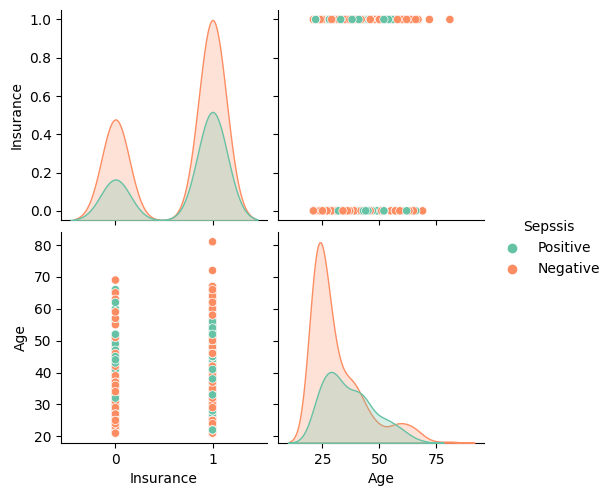

In [17]:
sns.pairplot(train_data[['Insurance', 'Age', 'Sepssis']], hue='Sepssis', palette='Set2');

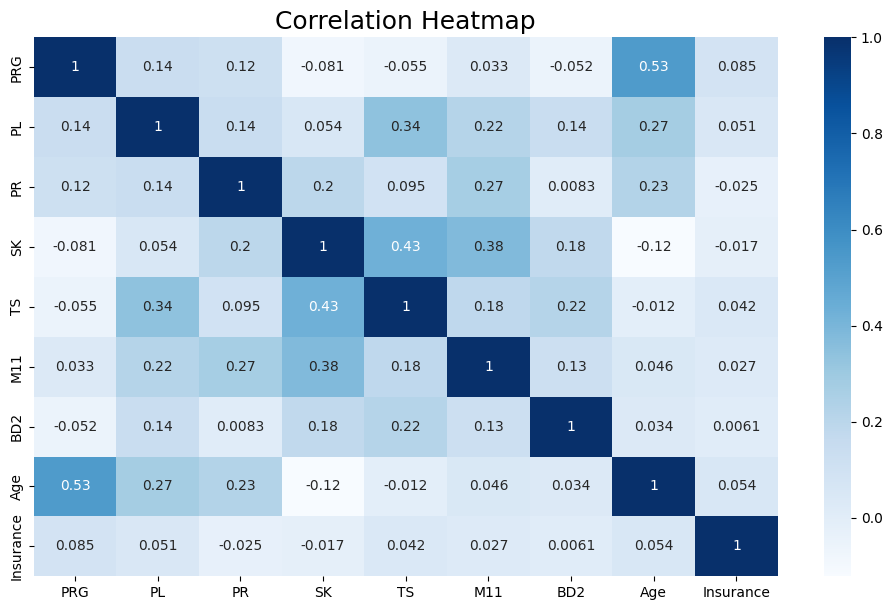

In [18]:
numerical_data = train_data.drop(['ID', 'Sepssis'], axis=1)
corr_matrix = numerical_data.corr()

plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, fmt='.2g')
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

### Multivariate Analysis

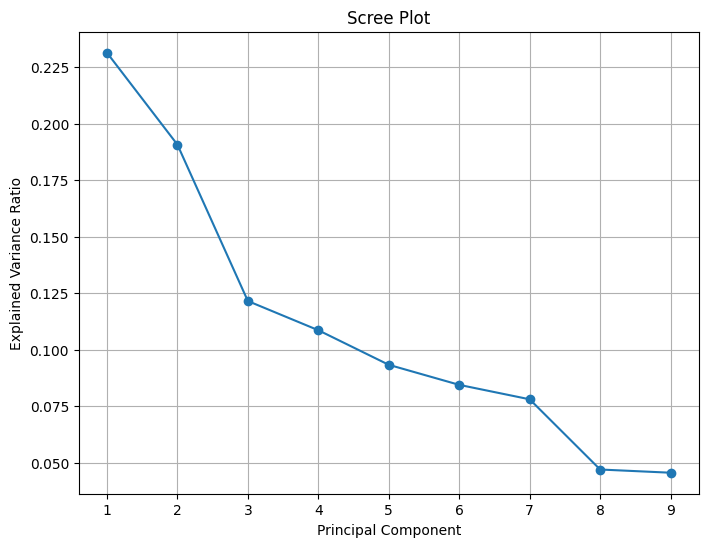

In [19]:
pca_data = train_data.drop(['ID', 'Sepssis'], axis=1)
# Step 1: Standardize the features (optional but recommended for PCA)
mean = np.mean(pca_data, axis=0)
std_dev = np.std(pca_data, axis=0)
data_std = (pca_data - mean) / std_dev

# Step 2: Perform PCA
pca = PCA()
train_data_pca = pca.fit_transform(data_std)

# Step 3: Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 4: Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

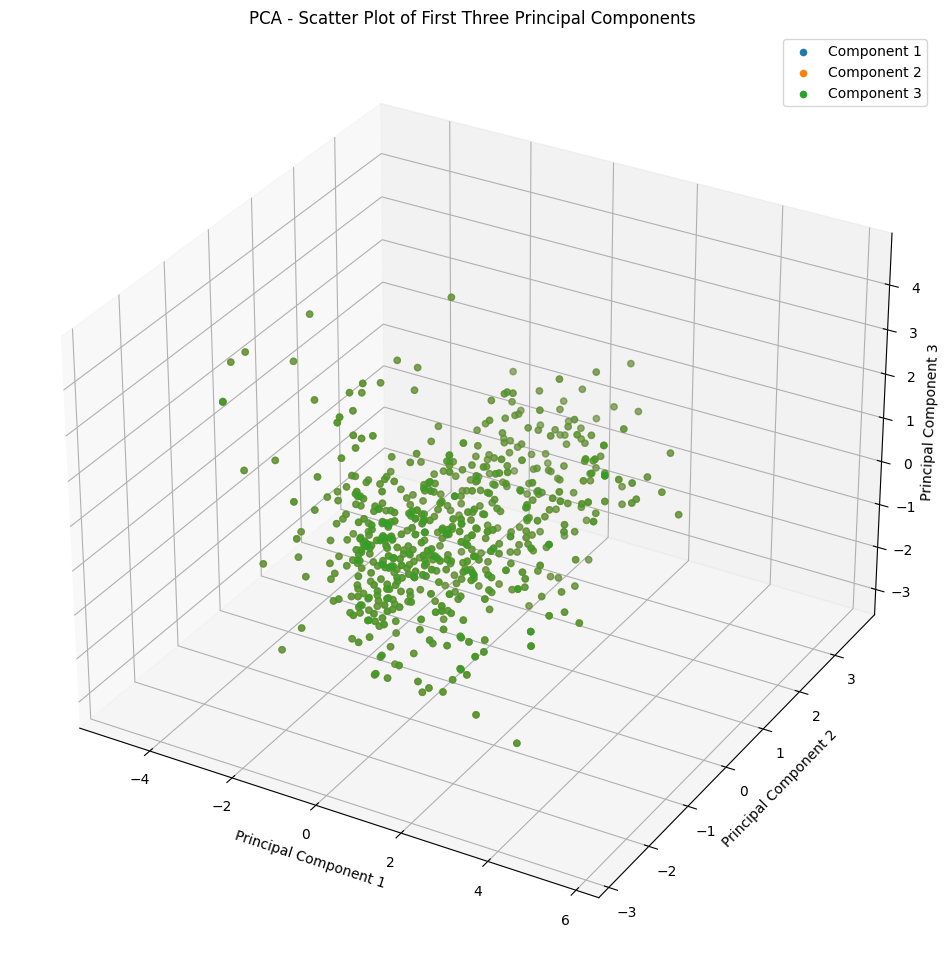

In [20]:
num_components = 3  # Choose the desired number of principal components

# Step 6: Perform PCA with the selected number of components
pca = PCA(n_components=num_components)  # Choose the selected number of principal components
train_data_pca = pca.fit_transform(data_std)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')


for i in range(num_components):
    ax.scatter(train_data_pca[:, 0], train_data_pca[:, 1], train_data_pca[:, 2], cmap='blue_green', label=f'Component {i+1}')

ax.set_title('PCA - Scatter Plot of First Three Principal Components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3', rotation=90)
ax.zaxis.labelpad=-0.07
ax.legend()
plt.show()

### Hypothesis

`Null Hypothesis:` There is no association between age and the likelihood of developing sepsis.

`Alternate Hypothesis:` There is a significant association between age and the likelihood of developing sepsis.

In [21]:
def age_group(age):
    '''This function groups ages into four groups'''
    if age <= 25: # Since the minimum age is 21 we used this division.
        return 'Young Adults'
    elif age <= 44:
        return 'Adults'
    elif age <= 59:
        return 'Middle Age'
    else:
        return 'Old Age'


train_data['Age_group'] = train_data['Age'].apply(age_group)

contingency_table = pd.crosstab(train_data['Age_group'], train_data['Sepssis'])

# Chi-square test
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Print results
print(f'The Chi-square test statistic is {chi2: .3f}')
print(f'The P-value is {p_value: .12f}')

print(25*"==")
if p_value < 0.05:
    print("We reject the null hypothesis and conclude that there is a significant association between age and the likelihood of developing sepsis")
    
else:
    print("We fail to reject the null hypothesis and conclude that there is no association between age and the likelihood of developing sepsis.")


The Chi-square test statistic is  53.818
The P-value is  0.000000000012
We reject the null hypothesis and conclude that there is a significant association between age and the likelihood of developing sepsis


### Answering Analytical Questions

1. Is there a relationship between vital signs (PRG, PL, PR, SK, TS) and the likelihood of sepsis?

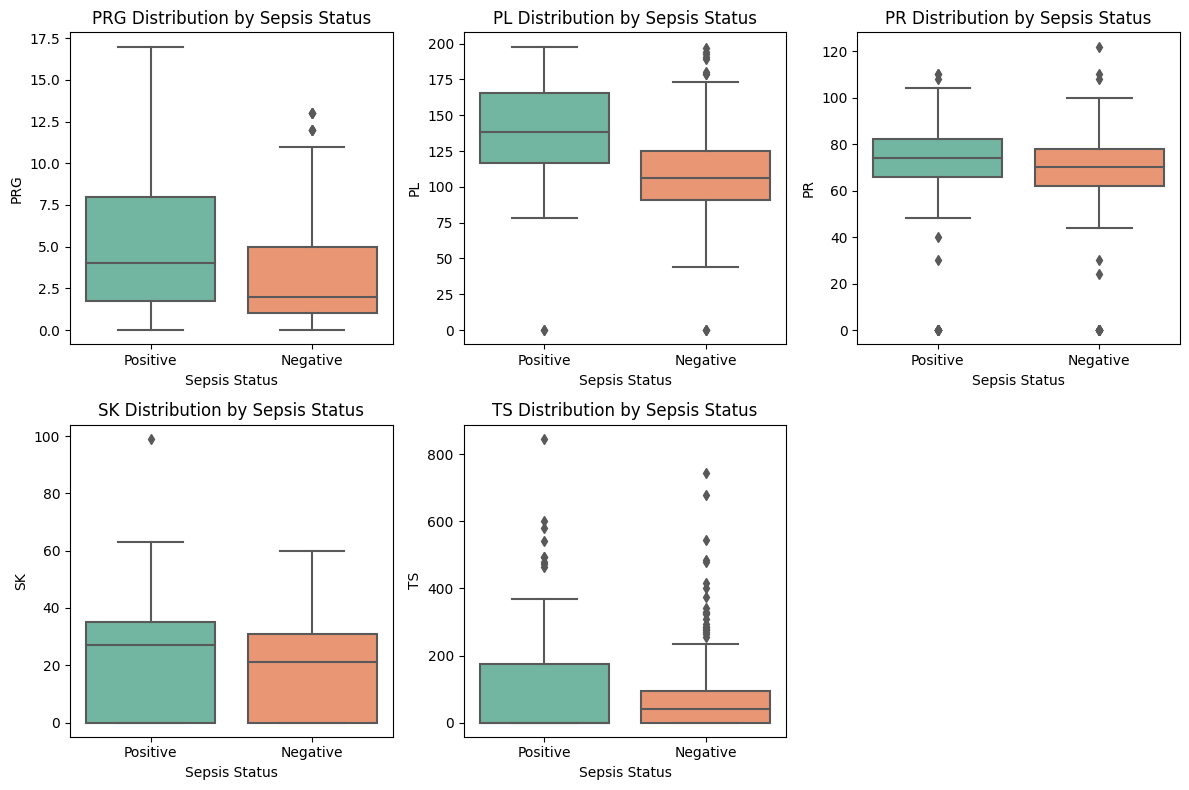

In [22]:
# Plot settings
plt.figure(figsize=(12, 8))

# Create subplots for each vital sign
for i, vital_sign in enumerate(['PRG', 'PL', 'PR', 'SK', 'TS']):
    plt.subplot(2, 3, i+1)  # Adjust subplot layout if necessary
    sns.boxplot(x='Sepssis', y=vital_sign, data=train_data, palette="Set2")
    
    plt.title(f'{vital_sign} Distribution by Sepsis Status')
    plt.xlabel('Sepsis Status')
    plt.ylabel(vital_sign)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

2. How do specific features (M11, Age) correlate with the presence of sepsis?

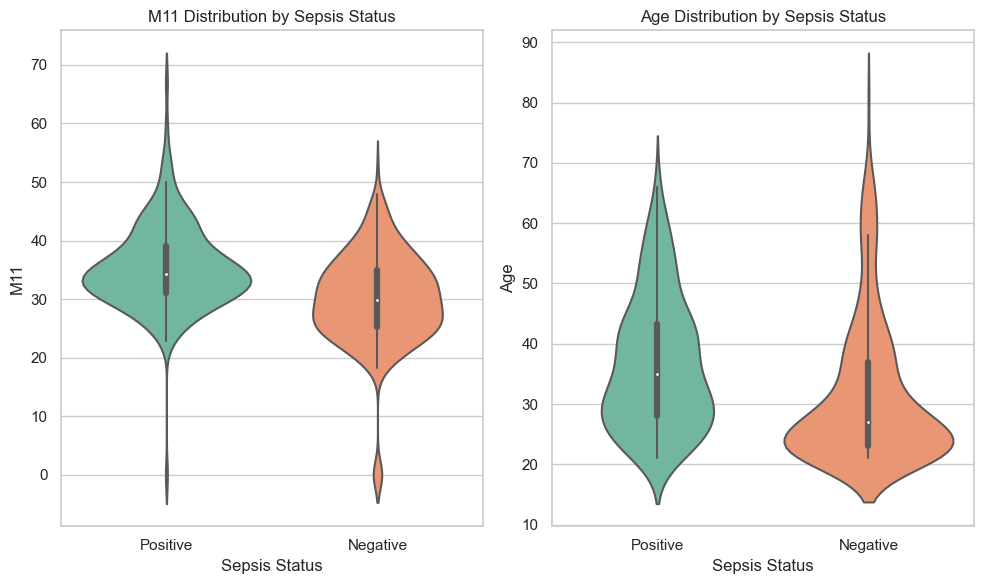

In [23]:
# Plot settings
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create violin plots for each laboratory test
for i, lab_test in enumerate(['M11', 'Age']):
    plt.subplot(1, 2, i+1)  # Adjust subplot layout if necessary
    sns.violinplot(x='Sepssis', y=lab_test, data=train_data, palette="Set2", split=True)

    plt.title(f'{lab_test} Distribution by Sepsis Status')
    plt.xlabel('Sepsis Status')
    plt.ylabel(lab_test)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

3. What is the breakdown of insured patients based on their sepsis status?

<Figure size 1000x600 with 0 Axes>

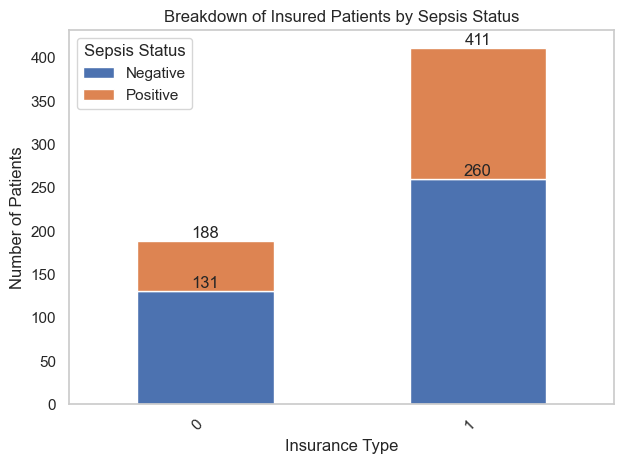

In [24]:
# Group data by 'Insurance' and 'Sepssis' and count occurrences
insurance_sepsis_counts = train_data.groupby(['Insurance', 'Sepssis']).size().unstack(fill_value=0)

# Plot settings
plt.figure(figsize=(10, 6))
ax = insurance_sepsis_counts.plot(kind='bar', stacked=True)

for bar in ax.containers:
    ax.bar_label(bar)

plt.title('Breakdown of Insured Patients by Sepsis Status')
plt.xlabel('Insurance Type')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')

plt.legend(title='Sepsis Status', loc='upper left')

plt.tight_layout()
plt.grid(visible=False)
plt.show()

4. What age group has the highest number of insured patients with sepsis?

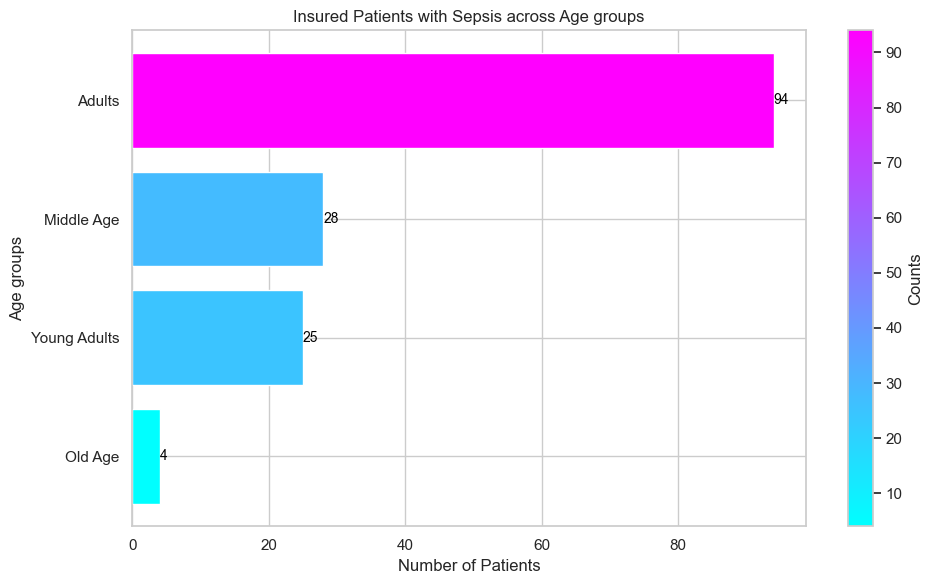

In [25]:
# Filter data to include only insured patients
insured_data = train_data[train_data['Insurance'] != 0]

# Group insured data by age group and sepsis status, and count occurrences
age_group_counts = insured_data[insured_data['Sepssis'] == 'Positive'].groupby('Age_group').size().sort_values()

# Normalize the counts to range [0, 1]
min_count = age_group_counts.min()
max_count = age_group_counts.max()
norm_age_group_counts = (age_group_counts - min_count) / (max_count - min_count)

# Create a custom colormap with gradient colors
cmap = plt.cm.cool  # You can choose any colormap
colors = cmap(norm_age_group_counts)

# Plot the horizontal bar chart with gradient colors
plt.figure(figsize=(10, 6))
bars = plt.barh(age_group_counts.index.astype(str), age_group_counts.values, color=colors)

# Add data labels to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}', 
             va='center', ha='left', fontsize=10, color='black')

# Add color bar legend
norm = mcolors.Normalize(vmin=min_count, vmax=max_count)
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical')
cbar.set_label('Counts')

plt.title('Insured Patients with Sepsis across Age groups')
plt.xlabel('Number of Patients')
plt.ylabel('Age groups')

plt.tight_layout()
plt.show()

## Data Preparation & Preprocessing

### Data Splitting

In [26]:
X = train_data.drop(['Sepssis','Age_group'], axis=1)
y = train_data['Sepssis']

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=.20, random_state=0, stratify=y)

In [27]:
label_enoder = LabelEncoder()
y_train_encoded = label_enoder.fit_transform(y_train)
y_eval_encoded = label_enoder.transform(y_eval)

In [28]:
# Create a class to deal with dropping Customer ID from the dataset
class columnDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Drop the specified column
        return X.drop('ID', axis=1)
    
    def get_feature_names_out(self, input_features=None):
        # If input_features is None or not provided, return None
        if input_features is None:
            return None
        # Return feature names after dropping the specified column
        return [feature for feature in input_features if feature != 'ID']

## Modeling & Evaluation

In [29]:
models = [
    ('Logistics Regression', LogisticRegression(random_state=0)),
    ('Random Forest', RandomForestClassifier(random_state=0)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=0)),
    ('KN Neighbors', KNeighborsClassifier()),
    ('SVC', SVC(probability=True, random_state=0))
]

In [30]:
features = X_train.columns

preprocessor = ColumnTransformer([
    ('imputer', SimpleImputer(missing_values=pd.NA, strategy='median'), selector(dtype_include=np.number)),
    ('transformer', FunctionTransformer(func=np.log1p, inverse_func=np.expm1), ['PRG', 'TS', 'BD2', 'Age']),
    ('scaling', RobustScaler(), ['PL', 'PR', 'SK', 'M11']),
    ],
    remainder='passthrough'
)


### Trained Models with Imbalanced Dataset

In [31]:
all_pipelines = {}
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'f1-score'])


# Loop through the model and classifier in the models list
for model, classifier in models:
    # Perform preprocessing and fit the respective models
    model_pipeline = Pipeline(steps=[
        ('column_dropper', columnDropper()),
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    all_pipelines[model] = model_pipeline

    model_pipeline.fit(X_train, y_train_encoded)
    # Predict values of the evaluation dataset
    y_pred = model_pipeline.predict(X_eval)

    # Print accuracy, precision, recall, and f1-score for all the models
    metrics_dict = classification_report(y_eval_encoded, y_pred, output_dict=True)

    accuracy = metrics_dict['accuracy']
    precision = metrics_dict['weighted avg']['precision']
    recall = metrics_dict['weighted avg']['recall']
    f1_score = metrics_dict['weighted avg']['f1-score']

    metrics_df.loc[len(metrics_df)] = [model, accuracy, precision, recall, f1_score]


metrics_df

,Model,Accuracy,Precision,Recall,f1-score
0,Logistics Regression,0.758333,0.752320,0.758333,0.748085
1,Random Forest,0.750000,0.744565,0.750000,0.735294
2,Gradient Boosting,0.758333,0.753448,0.758333,0.745504
3,KN Neighbors,0.758333,0.752320,0.758333,0.748085
4,SVC,0.733333,0.724574,0.733333,0.723347


We need to consider that the dataset is imbalanced, so we will use the f1-score to measure the performance of the model. The f1-score is the harmonic mean of precision and recall, making it a good measure for an imbalanced dataset.

The best performing models so far are Random Forest, K-Nearest Neighbors, and Gradient Boosting.

We will then balance the dataset using both SMOTE and Random Oversampler to see how the models perform after that.

### Trained Models with Balanced Dataset - RandomOver Sampler

In [32]:
# Create instance for RandomOver Sampler
random_over_sampler = RandomOverSampler(random_state=0)

In [33]:
ros_pipelines = {}
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'f1-score'])


# Loop through the model and classifier in the models list
for model, classifier in models:
    # Perform preprocessing and fit the respective models
    ros_balanced_pipeline = imblearn_pipeline(steps=[
        ('random_sampler', random_over_sampler),
        ('columns_dropper', columnDropper()),
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    ros_pipelines[model] = ros_balanced_pipeline

    ros_balanced_pipeline.fit(X_train, y_train_encoded)
    # Predict values of the evaluation dataset
    y_pred = ros_balanced_pipeline.predict(X_eval)

    # Print accuracy, precision, recall, and f1-score for all the models
    metrics_dict = classification_report(y_eval_encoded, y_pred, output_dict=True)

    accuracy = metrics_dict['accuracy']
    precision = metrics_dict['weighted avg']['precision']
    recall = metrics_dict['weighted avg']['recall']
    f1_score = metrics_dict['weighted avg']['f1-score']

    metrics_df.loc[len(metrics_df)] = [model, accuracy, precision, recall, f1_score]


metrics_df.sort_values('f1-score', ascending=False)

,Model,Accuracy,Precision,Recall,f1-score
1,Random Forest,0.800000,0.796717,0.800000,0.794352
2,Gradient Boosting,0.783333,0.778865,0.783333,0.777214
4,SVC,0.741667,0.746444,0.741667,0.743588
3,KN Neighbors,0.708333,0.713556,0.708333,0.710503
0,Logistics Regression,0.708333,0.706777,0.708333,0.707505


### Trained Models with Balanced Dataset - SMOTE Sampler

In [34]:
smote_sampler = SMOTE(random_state=0)

In [35]:
smote_pipelines = {}
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'f1-score'])


# Loop through the model and classifier in the models list
for model, classifier in models:
    # Perform preprocessing and fit the respective models
    smote_balanced_pipeline = imblearn_pipeline(steps=[
        ('column_dropper', columnDropper()),
        ('preprocessor', preprocessor),
        ('smote_sampler', smote_sampler),
        ('classifier', classifier)
    ])

    smote_pipelines[model] = smote_balanced_pipeline

    smote_balanced_pipeline.fit(X_train, y_train_encoded)
    # Predict values of the evaluation dataset
    y_pred = smote_balanced_pipeline.predict(X_eval)

    # Print accuracy, precision, recall, and f1-score for all the models
    metrics_dict = classification_report(y_eval_encoded, y_pred, output_dict=True)

    accuracy = metrics_dict['accuracy']
    precision = metrics_dict['weighted avg']['precision']
    recall = metrics_dict['weighted avg']['recall']
    f1_score = metrics_dict['weighted avg']['f1-score']

    metrics_df.loc[len(metrics_df)] = [model, accuracy, precision, recall, f1_score]


metrics_df.sort_values('f1-score', ascending=False)

,Model,Accuracy,Precision,Recall,f1-score
2,Gradient Boosting,0.783333,0.778865,0.783333,0.777214
1,Random Forest,0.783333,0.781111,0.783333,0.773016
4,SVC,0.741667,0.750204,0.741667,0.744646
0,Logistics Regression,0.741667,0.740306,0.741667,0.740933
3,KN Neighbors,0.716667,0.723678,0.716667,0.719378


After comparing the results of both techniques for balancing the dataset, it is clear that the performance of the RandomOver sampler outperforms the SMOTE sampler. The top three models will be selected and persisted for use in our API framework.

### Model Persistence

### Prediction with Test dataset

`Observations:`

1. The scale for the data are not the same on all the columns.
2. There are no null values in the dataset.
3. There are no duplicate values in the dataset.
4. The target column is not evenly distributed.
5. The feature columns are not normally distributed.
6. The Boxplot shows some outliers in the dataset.
7. Most of the patients are between the ages 20 and 30.
8. The Scree plot shows that the first three components explains most of the variability in the data.